###Este código Python genera un conjunto de datos simulado de 30 transacciones/denuncias potencialmente fraudulentas o sospechosas y lo guarda en un archivo CSV llamado fraude.csv.

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
import random

fake = Faker('es_AR')
num_usuarios = 30
monto_minimo = 10.00
monto_maximo = 1000.00
tipos_transaccion = ['Transacción Bancaria', 'Denuncia de Corrupción']
descripciones = ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal']

data_usuarios = {
    'Tipo': [random.choice(tipos_transaccion) for _ in range(num_usuarios)],
    'Descripcion': [random.choice(descripciones) for _ in range(num_usuarios)],  # Corregido: usa random.choice() para seleccionar una descripción aleatoria
    'Monto': [round(random.uniform(monto_minimo, monto_maximo), 2) for _ in range(num_usuarios)],
    'Fecha': [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_usuarios)],
    'Estado': [fake.random_element(elements=('Pendiente', 'Rechazado')) for _ in range(num_usuarios)]
}

df_usuarios = pd.DataFrame(data_usuarios)
print(df_usuarios)

# Código para descargar el DataFrame en un archivo CSV
nombre_archivo_csv = 'fraude.csv'
df_usuarios.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado exitosamente en el archivo '{nombre_archivo_csv}'")
df_usuarios

###Algoritmo de machine learning, este código analiza un conjunto de datos de eventos sospechosos de fraude, mostrando la frecuencia de diferentes tipos de eventos, ejemplos de descripciones, y el impacto económico potencial (montos) de los eventos.

Tipos de Eventos:
Tipo
Transacción Bancaria      17
Denuncia de Corrupción    13
Name: count, dtype: int64

Ejemplos de Descripciones:
                      Tipo                                 Descripcion
0   Denuncia de Corrupción              Transferencia a paraíso fiscal
1     Transacción Bancaria         Retiro de gran cantidad en efectivo
2     Transacción Bancaria              Transferencia a paraíso fiscal
3     Transacción Bancaria  Transferencia inusual a cuenta desconocida
4   Denuncia de Corrupción   Denuncia de soborno a funcionario público
5     Transacción Bancaria   Denuncia de soborno a funcionario público
6   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida
7     Transacción Bancaria              Transferencia a paraíso fiscal
8     Transacción Bancaria  Transferencia inusual a cuenta desconocida
9   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida
10  Denuncia de Corrupción              Transferencia a paraíso fiscal
11  Denuncia 

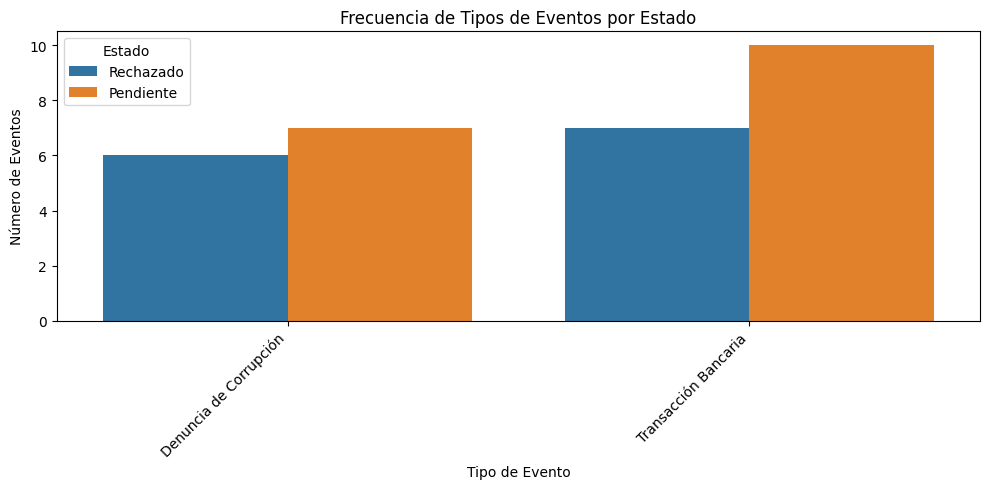

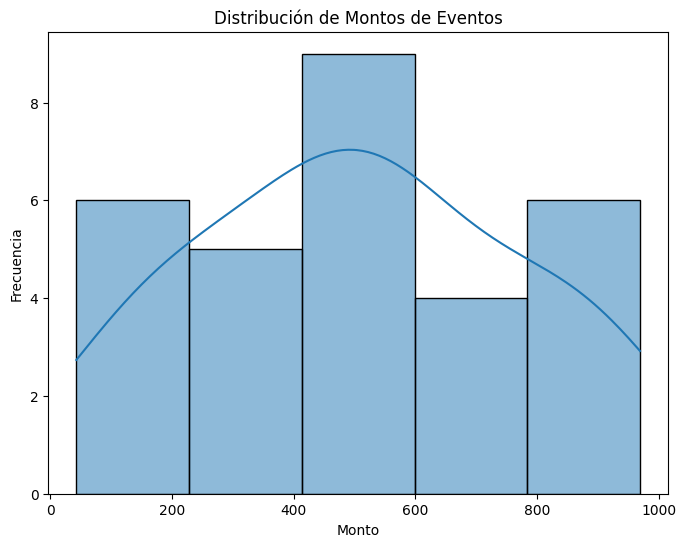

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/fraude.csv"

df = pd.read_csv(url)
df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' ya está definido con los datos que generaste anteriormente.

print("Tipos de Eventos:")
print(df['Tipo'].value_counts())

print("\nEjemplos de Descripciones:")
print(df[['Tipo', 'Descripcion']])  # Corregido: 'Descripcion' en lugar de 'Descripción'

print("\nAnálisis de Montos (Impacto Económico Potencial):")
print("Monto Total de Eventos Sospechosos:", df[df['Estado'] == 'Sospechoso']['Monto'].sum())
print("Monto Total de Eventos Investigados:", df[df['Estado'] == 'Investigado']['Monto'].sum())

plt.figure(figsize=(10, 5))
sns.countplot(x='Tipo', hue='Estado', data=df)
plt.title('Frecuencia de Tipos de Eventos por Estado')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Monto'], bins=5, kde=True)
plt.title('Distribución de Montos de Eventos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()